In [423]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [424]:
data= pd.read_csv('train.csv')
test_org= pd.read_csv('test.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### data exploration

In [425]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


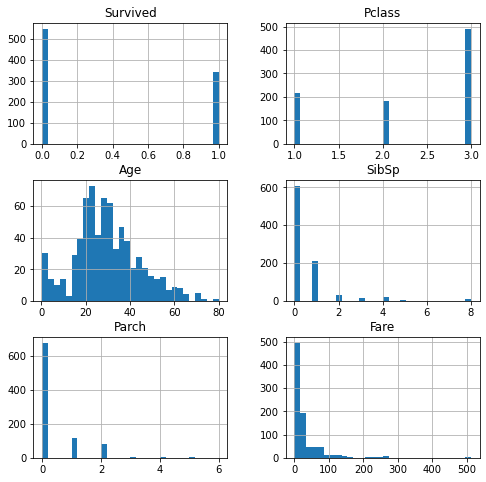

In [426]:
data.drop(columns=['PassengerId']).hist(figsize=(8,8), bins=30)
plt.show()

In [427]:
data[data['Survived'] == 1]['Cabin'].notna().sum()

136

In [428]:
data[data['Survived'] == 1]['Cabin'].value_counts()

B96 B98        4
E101           3
F33            3
C92            2
C23 C25 C27    2
              ..
C101           1
E68            1
B101           1
C148           1
B80            1
Name: Cabin, Length: 101, dtype: int64

In [429]:
data[data['Survived'] == 0]['Cabin'].notna().sum()

68

In [430]:
data[data['Survived'] == 0]['Cabin'].value_counts()

F G73          2
C22 C26        2
D26            2
C23 C25 C27    2
G6             2
              ..
T              1
B37            1
B22            1
C95            1
E63            1
Name: Cabin, Length: 62, dtype: int64

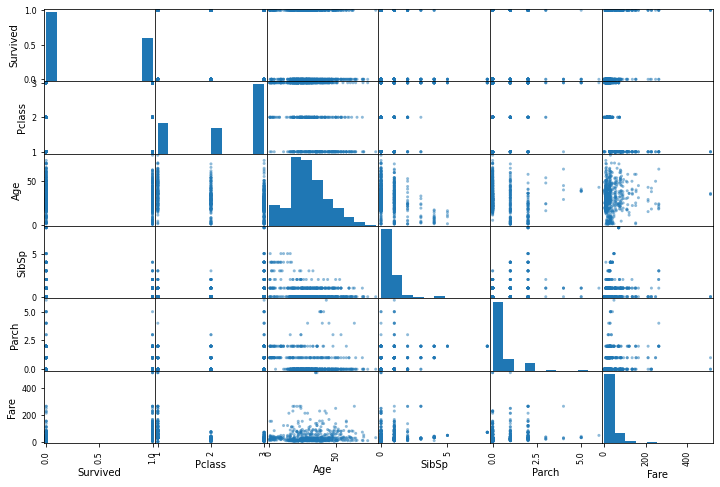

In [431]:
from pandas.plotting import scatter_matrix

scatter_matrix(data.drop(columns=['PassengerId']), figsize=(12, 8))
plt.show()

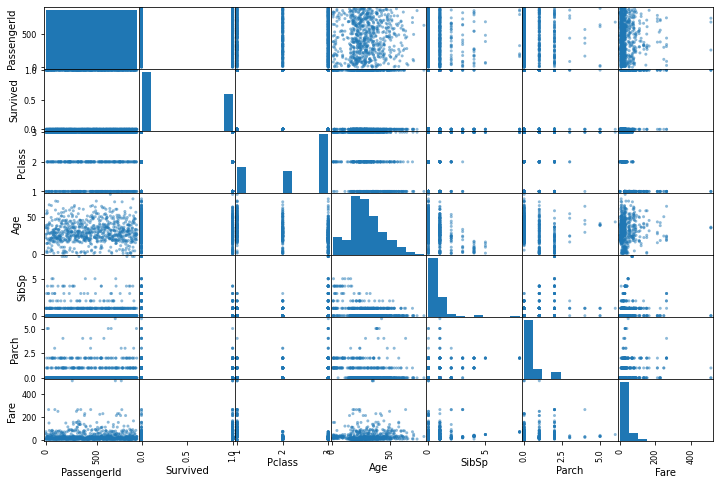

In [432]:
from pandas.plotting import scatter_matrix

scatter_matrix(data, figsize=(12, 8))
plt.show()

In [433]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


_______________________________
* 'Cabin' has many Nulls --> mostly will drop the column (not very usefull or representive data) (OK)
* 'Embarked' has 2 Nulls --> just replace them manually (OK)
* 'Name' & 'Ticket' & 'PassengerId' --> are useless in predicition.. so drop them (OK)
* 'Age' has NULLs --> predict the null values - drop cabin column (not usefull)) (OK)
* 'Survival' mean is ~ 40% --> so data is not imbalanced
* 'Fare' has big Standard Deviation --> beter include a scalling step
* 'Fare' & 'Pclass' --> has the highest correlation with 'Survived'

### Data preprocessing

#### A) handle Null values in 'Cabin'

In [434]:
train= data.copy()
train= train.drop(columns=['Cabin'])
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


#### B) handle Null values in 'Embarked'

In [435]:
train[train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [436]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [437]:
aaa= train[(~train['Embarked'].isna() & train['Survived']== 1)]
aaa['Embarked'].value_counts()

# conclude that the C chances of dying is higher than the S... 
# and based on that the 2 rows with Nulls has survived.. then will assign them to S

S    217
C     93
Q     30
Name: Embarked, dtype: int64

In [438]:
train.loc[61,'Embarked'] = 'S'
train.loc[829,'Embarked'] = 'S'

In [439]:
train[train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


#### C) drop 'Name' & 'Ticket' & 'PassengerId'


In [440]:
train= train.drop(columns=['Name' , 'Ticket', 'PassengerId'])

#### D) handle Null values in 'Age'
* I will use a linear regression model to predict the null values 

In [441]:
# first step is to use get_dummies() for categorical variables ###
null_data= pd.get_dummies(train)

In [442]:
null_data.head(1)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.25,0,1,0,0,1


In [443]:
# first step is to make a train dataset, and target dataset (to be predicted)
null_train_data= null_data[~null_data['Age'].isna()]
null_target_data= null_data[null_data['Age'].isna()]

In [444]:
null_train_data['Age'].isna().sum()

0

In [445]:
null_target_data['Age'].isna().sum()

177

In [446]:
# make the data the model will use to fit
null_train_data_X= null_train_data.drop(columns= ['Age'])
null_train_data_y= null_train_data[['Age']]

In [447]:
null_train_data_X.head(1)

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,7.25,0,1,0,0,1


In [448]:
null_train_data_y.head(1)

,Age
0,22.0


In [449]:
# make the data that the model will use to predict
null_target_data_X= null_target_data.drop(columns= ['Age'])

In [450]:
# make the linear regressor to predict the target values
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(null_train_data_X, null_train_data_y)
null_target_data_predicted= reg.predict(null_target_data_X)

In [451]:
# now, assign the predicted values to the full dataset
null_data.loc[null_data['Age'].isnull(), 'Age'] = null_target_data_predicted

In [452]:
null_data.isnull().sum()
# whoho, got rid of all the Nulls

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [453]:
null_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.396248,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,0.725028
std,0.486592,0.836071,13.712318,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,0.446751
min,0.000000,1.000000,-5.852191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,36.418490,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [454]:
sorted(null_data.Age)
## so, there are 7 values with negative age!! -_-
## will replace them with the mean.

[-5.852190776864866,
 -5.852190776864866,
 -5.852190776864866,
 -5.852190776864866,
 -5.623419455512362,
 -5.623419455512362,
 -5.623419455512362,
 0.42,
 0.67,
 0.75,
 0.75,
 0.83,
 0.83,
 0.92,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 6.0,
 6.0,
 6.0,
 7.0,
 7.0,
 7.0,
 8.0,
 8.0,
 8.0,
 8.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 10.0,
 10.0,
 11.0,
 11.0,
 11.0,
 11.0,
 12.0,
 13.0,
 13.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.5,
 15.0,
 15.0,
 15.0,
 15.0,
 15.0,
 15.574327262806882,
 15.574327262806882,
 15.716654684324936,
 15.844360987584508,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.073132308937012,
 16.073132308937012,
 16.073132308937012,
 16.57758721627721,
 16.806358537629713,
 17.0,
 17.0,
 17.0,

In [455]:
null_data[null_data['Age']< 0]

null_data.loc[null_data['Age']< 0, 'Age'] = null_data['Age'].mean()

In [456]:
null_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.672402,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,0.725028
std,0.486592,0.836071,13.350408,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,36.418490,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [457]:
train = null_data

In [458]:
train.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

####  <> spliting data <>

In [459]:
X_train, y_train= train.drop(columns=['Survived']) , data[['Survived']]

In [460]:
X_train.head(1)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.25,0,1,0,0,1


In [461]:
# y.head(1)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

#### E) apply scalling on data

In [462]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

In [464]:
X_train_scaled

array([[ 0.82737724, -0.57501693,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-1.56610693,  0.6241214 ,  0.43279337, ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 0.82737724, -0.27523235, -0.4745452 , ..., -0.48204268,
        -0.30756234,  0.61583843],
       ...,
       [ 0.82737724, -0.46975674,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-1.56610693, -0.27523235, -0.4745452 , ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 0.82737724,  0.17444452, -0.4745452 , ..., -0.48204268,
         3.25137334, -1.62380254]])

### preparing test data

In [498]:
test= test_org.copy() #####################################################################

In [499]:
test= test.drop(columns=['Cabin'])
test= test.drop(columns=['Name' , 'Ticket', 'PassengerId'])

# there is a null in 'Fare' .. replace it manually with the mean
test.loc[test['Fare'].isna(), 'Fare'] = test['Fare'].mean()

# make dummies for categorical data
test= pd.get_dummies(test)

In [500]:
test_age_null= test[test['Age'].isna()].drop(columns=['Age'])
test_age_null

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
10,3,0,0,7.8958,0,1,0,0,1
22,1,0,0,31.6833,1,0,0,0,1
29,3,2,0,21.6792,0,1,1,0,0
33,3,1,2,23.4500,1,0,0,0,1
36,3,0,0,8.0500,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
408,3,0,0,7.7208,1,0,0,1,0
410,3,0,0,7.7500,1,0,0,1,0
413,3,0,0,8.0500,0,1,0,0,1
416,3,0,0,8.0500,0,1,0,0,1


In [501]:
# remove 'Survived' column from train data (to be able to train on same columns when I train on test data)
null_train_data_X_no_survived = null_train_data_X.drop(columns=['Survived'])

In [502]:
## predicting missing values in 'Age' ##

# this model is trained on values of train dataset .. to predict the values of 'Age'
reg = LinearRegression()
reg.fit(null_train_data_X_no_survived, null_train_data_y)
null_test_data_predicted= reg.predict(test_age_null)

In [503]:
# now, assign the predicted values to the full dataset
test.loc[test['Age'].isnull(), 'Age'] = null_target_data_predicted

# replace ages lower than 0 with the mean
test[test['Age']< 0]
test.loc[test['Age']< 0, 'Age'] = test['Age'].mean()

In [504]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,29.902209,0.447368,0.392344,35.627188,0.363636,0.636364,0.244019,0.110048,0.645933
std,0.841838,12.946630,0.896760,0.981429,55.840500,0.481622,0.481622,0.430019,0.313324,0.478803
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,28.079404,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,36.875000,1.000000,0.000000,31.500000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [505]:
# scale the test dataset
test_scaled = scaler.fit_transform(test)

In [506]:
# change y from dataframe to array
y= np.ravel(y_train)

### Modeling

#### model 1 : Logistic Regression

In [363]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train_scaled, y)

# pred1= model1.predict(test_scaled) 

LogisticRegression()

In [372]:
from sklearn.model_selection import cross_val_score

forest_scores= cross_val_score(model1, X_train_scaled, y, cv=10)
forest_scores.mean()

0.8114481897627964

#### model 2 : Random Forest Classifier

In [365]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train_scaled, y)

RandomForestClassifier()

In [373]:
forest_scores= cross_val_score(model2, X_train_scaled, y, cv=10)
forest_scores.mean()

0.8395755305867665

#### model 3 : Gradient Boosting Classifier

In [367]:
from sklearn.ensemble import GradientBoostingClassifier
model3 = GradientBoostingClassifier(n_estimators=7,learning_rate=1.1)
model3.fit(X_train_scaled, y)

GradientBoostingClassifier(learning_rate=1.1, n_estimators=7)

In [374]:
forest_scores= cross_val_score(model3, X_train_scaled, y, cv=10)
forest_scores.mean()

0.8204619225967541

#### model 4 : XGBClassifier

In [377]:
from xgboost import XGBClassifier
model4= XGBClassifier()
model4.fit(X_train_scaled, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [384]:
forest_scores= cross_val_score(model4, X_train_scaled, y, cv=10)
forest_scores.mean()

0.823820224719101

In [514]:
xg = XGBClassifier(learning_rate=0.02, n_estimators=750,
                   max_depth= 3, min_child_weight= 1, 
                   colsample_bytree= 0.6, gamma= 0.0, 
                   reg_alpha= 0.001, subsample= 0.8
                  )

In [515]:
forest_scores= cross_val_score(xg, X_train_scaled, y, cv=10)
forest_scores.mean()

0.8417852684144819

#### model 5 : SVC

In [379]:
from sklearn.svm import SVC
model5= SVC()
model5.fit(X_train_scaled, y)

SVC()

In [380]:
forest_scores= cross_val_score(model5, X_train_scaled, y, cv=10)
forest_scores.mean()

0.8271785268414483

#### model 6 : Naive Bayes

In [394]:
from sklearn.naive_bayes import GaussianNB
model6 = GaussianNB()
model6.fit(X_train_scaled, y)

GaussianNB()

In [395]:
forest_scores= cross_val_score(model6, X_train_scaled, y, cv=10)
forest_scores.mean()

0.7845443196004994

#### model 7 : K-Nearest Neighbors

In [392]:
from sklearn.neighbors import KNeighborsClassifier
model7= KNeighborsClassifier(n_neighbors=3)
model7.fit(X_train_scaled, y)

KNeighborsClassifier(n_neighbors=3)

In [393]:
forest_scores= cross_val_score(model7, X_train_scaled, y, cv=10)
forest_scores.mean()

0.8194132334581774

#### model 8 : AdaBoostClassifier

In [387]:
from sklearn.ensemble import AdaBoostClassifier
model8= AdaBoostClassifier(base_estimator= RandomForestClassifier())
model8.fit(X_train_scaled, y)

AdaBoostClassifier(base_estimator=RandomForestClassifier())

In [388]:
forest_scores= cross_val_score(model8, X_train_scaled, y, cv=10)
forest_scores.mean()

0.8339575530586766

>  #### top classifiers 
* Random Forest Classifier -> .839
* AdaBoostClassifier(RandomForestClassifier()) -> .834
* SVC -> .827
* XGBClassifier -> .823

### Grid Search on best model (to find best hyperparameters)

In [404]:
# Use the random grid to search for best hyperparameters
from sklearn.model_selection import RandomizedSearchCV

params= {'criterion' : ['gini', 'entropy', 'log_loss'],
 'bootstrap': [True, False],
 'max_depth': [20, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 100, 200]}

# search across 100 different combinations (n_iter = 100), and use all available cores (n_jobs = -1)
RandomForest_random = RandomizedSearchCV(estimator = model2, param_distributions = params, 
                               n_iter = 100, cv = 3, verbose=3, n_jobs = -1)
# Fit the random search model
RandomForest_random.fit(X_train_scaled, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.8372615  0.83501684 0.8338945  0.8305275  0.84062851 0.84175084
 0.8338945  0.83950617 0.8372615         nan 0.82379349 0.84287318
 0.83501684        nan 0.84287318        nan        nan        nan
        nan 0.84062851 0.8372615  0.8338945         nan 0.82154882
 0.81593715        nan 0.84062851 0.84175084 0.82940516 0.81593715
 0.82379349 0.82716049 0.83950617 0.8305275  0.82716049        nan
        nan        nan 0.83613917 0.82828283 0.83501684        nan
        nan 0.8372615         nan 0.83164983        nan 0.83277217
        nan 0.82940516        nan 0.83613917        nan        nan
 0.83613917 0.81705948        nan 0.82491582 0.83501684        nan
 0.83277217 0.83838384 0.84175084 0.8372615  0.83164983 0.83501684
 0.83613917        nan 0.8338945  0.81481481        nan 0.84175084
        nan        nan        nan        nan        n

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [20, 40, 60, 80, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   verbose=3)

In [405]:
RandomForest_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'criterion': 'gini',
 'bootstrap': True}

In [406]:
forest_scores= cross_val_score(RandomForest_random, X_train_scaled, y, cv=10, verbose=3)
forest_scores.mean() # ---> 0.8474032459425718

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.83770287 0.83021223 0.83895131        nan
 0.84019975 0.83021223 0.83021223        nan 0.83270911 0.83395755
 0.83895131 0.83645443 0.84519351 0.83645443 0.84394507 0.83895131
        nan        nan 0.83770287 0.83645443 0.84144819 0.83645443
 0.83146067 0.83895131        nan 0.83895131        nan 0.84144819
 0.84394507 0.83395755        nan 0.81897628 0.83770287        nan
        nan 0.83395755 0.83895131 0.84019975 0.83895131 0.83270911
 0.82771536 0.8164794  0.83645443        nan 0.83895131        nan
        nan        nan 0.83895131 0.84019975 0.8289638         nan
 0.84019975        nan 0.83770287 0.83395755 0.84269663 0.83645443
        nan 0.83770287 0.84269663 0.83270911        nan        nan
 0.83146067 0.83520599 0.84144819 0.82771536        nan        nan
        nan 0.84394507 0.8289638         nan        n

[CV] END ................................ score: (test=0.811) total time=   8.4s
Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.83542494 0.83293737 0.82048559 0.83666406        nan        nan
 0.81548251        nan        nan 0.8341765  0.81922317 0.83791716
 0.82172471        nan        nan 0.82667654        nan 0.8291874
        nan 0.82920137        nan 0.82547003 0.83168428 0.83294203
        nan        nan 0.82921069 0.82544674 0.82669052 0.83791716
 0.83045913        nan 0.8266812         nan 0.83541096 0.83294203
 0.83291874 0.83167496        nan 0.84165782 0.82669983 0.83917491
 0.82419364 0.83542959        nan 0.81923715        nan        nan
 0.8291641         nan 0.82419364        nan 0.8391656  0.81919522
        nan 0.83667337 0.82168744        nan        nan        nan
 0.83418581 0.8291874  0.82796225 0.83293737 0.83044981 0.83293737
 0.83666872 0.82417966        nan 0.83292806        nan        nan
 0.83417184 0.82544674 0.81548717        nan        na

[CV] END ................................ score: (test=0.843) total time=   7.4s
Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.84165782 0.85413289        nan 0.83293271 0.85287514
 0.84664692 0.83668269 0.83043118 0.84913448 0.84914379 0.85038758
        nan        nan 0.84912982 0.84290626        nan        nan
 0.8516267  0.85163601 0.84789535 0.84042335 0.85038292 0.84913914
 0.85163136 0.84539848 0.85911268 0.8429016         nan        nan
        nan 0.85161738 0.85039689        nan 0.83667803 0.84913448
 0.83294203        nan 0.84665623 0.84538916 0.85412824 0.85662511
 0.85287514 0.83790784        nan 0.84788604        nan        nan
 0.84912982        nan 0.85537202 0.83792181 0.84914379 0.85287514
        nan 0.85163136        nan        nan 0.84913448 0.84292023
 0.85286582        nan 0.85537202 0.85662977        nan 0.84041403
 0.84539848        nan        nan 0.84415469        nan 0.8566158
 0.85287514 0.82669983        nan 0.8503736         na

[CV] END ................................ score: (test=0.775) total time=   8.1s
Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.82796225 0.83045913 0.81673561        nan        nan
 0.82549332        nan 0.83545289        nan        nan 0.82795293
 0.82921069        nan 0.83545289        nan 0.83170291        nan
 0.82048093 0.84168577 0.83045447 0.83544357        nan        nan
 0.82796225 0.83171688 0.82796225        nan 0.83670132 0.83296532
 0.82920137 0.81424805        nan 0.82673244 0.82795293 0.81922317
 0.81299029        nan 0.81925112 0.83794045 0.83544357 0.81549649
        nan 0.81672629 0.81299029 0.83294203 0.83543891 0.83295601
 0.83294669 0.83294203 0.83294669 0.81922783 0.83296066 0.83295135
 0.81301358 0.83669201 0.82422625 0.82922           nan        nan
        nan        nan 0.82047161 0.82423091 0.83670132 0.82422159
 0.84043733 0.83793579        nan 0.81922317        nan        nan
 0.83420445 0.82173868        nan        nan        n

[CV] END ................................ score: (test=0.888) total time=   7.7s
Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.82420296 0.82172937        nan 0.82547934        nan
 0.82298247        nan 0.82423091 0.82672778 0.82172471        nan
 0.82797157        nan 0.83170291 0.8304731  0.82546071 0.80053851
 0.825484          nan        nan        nan 0.82423556 0.83046844
 0.82174334        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.81922317 0.82174334
        nan        nan 0.81548717 0.81674959 0.81798405 0.82673244
        nan 0.82049025 0.83045447 0.83046844        nan 0.83169825
 0.82547003 0.81548251 0.83045913 0.79929007 0.81798871 0.82298247
 0.81175117 0.83045913 0.82796691 0.82048093        nan 0.8155058
 0.83171223        nan        nan 0.82672778        nan 0.83171688
 0.83047776 0.83296066        nan 0.83170757 0.82547469 0.82047627
        nan 0.81423407 0.83419979 0.82547934        na

[CV] END ................................ score: (test=0.888) total time=   7.4s
Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.83419979 0.82172005        nan        nan 0.81924646 0.83169825
 0.83420445        nan 0.82546537 0.83170291        nan        nan
        nan        nan        nan 0.83296532 0.83420445 0.82422625
 0.82795293 0.83171223        nan 0.82296849 0.82172005        nan
 0.82922    0.83046379 0.83670598        nan        nan 0.83296066
 0.83046844 0.82797622 0.83045913 0.82797157 0.83420445 0.81675424
 0.82298247 0.82921069 0.84043733 0.83419979        nan        nan
 0.83668735 0.82795293        nan        nan        nan        nan
        nan        nan 0.81799337 0.81674493        nan 0.83419979
        nan 0.81800734 0.83544823 0.83171223 0.83419979 0.81176514
 0.82422625 0.82172937 0.82422159        nan 0.83295601        nan
        nan 0.8342091  0.83671064 0.83046844 0.82172937 0.83045913
 0.81923249 0.81798871        nan        nan        n

[CV] END ................................ score: (test=0.876) total time=   8.5s
Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.83296532 0.83421376        nan 0.83295135 0.83419979
        nan        nan 0.82047627        nan 0.83545754 0.83670598
 0.83668735        nan 0.82546071 0.83419979 0.81797939 0.83544823
 0.84294818        nan 0.82921535        nan 0.8304731         nan
 0.83420445 0.83545289        nan 0.83420445        nan        nan
        nan        nan 0.83669667        nan 0.83046379 0.83670132
        nan        nan 0.82796225 0.83295601        nan        nan
 0.83668735        nan 0.83544823 0.82921535 0.82670915        nan
        nan        nan 0.84292955 0.81047478 0.83670132 0.83046844
 0.83046379 0.82297781        nan 0.81423407        nan        nan
 0.83420445        nan        nan 0.82921535 0.81674027        nan
 0.83420445        nan 0.82049025 0.82793896        nan 0.84542643
        nan        nan        nan 0.83544823 0.836696

[CV] END ................................ score: (test=0.831) total time=   7.5s
Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.83918889 0.83171223 0.83671064        nan 0.82420761 0.84169974
 0.83794976 0.8354622  0.83670598 0.83670598 0.83296532        nan
        nan 0.83170757 0.83419979 0.84417799        nan 0.83794976
 0.83545289        nan 0.83297464        nan 0.83919355 0.81174651
        nan        nan 0.83796374 0.83296532 0.8342091  0.82670449
        nan 0.83545754 0.83919355 0.83670132 0.82921069 0.83169359
        nan 0.82421693 0.83670132 0.8404513         nan 0.83545289
 0.84044198 0.83170291 0.82671381        nan        nan 0.83171223
 0.82420761 0.83170757        nan 0.84168577 0.84044198 0.8367153
        nan 0.83793113 0.82919205        nan 0.83168893        nan
 0.83046844 0.83545754 0.83420445 0.83171688 0.83296532        nan
 0.84042801        nan 0.83794511 0.83419047 0.83545289 0.83669667
        nan 0.83045913 0.81797007 0.83295601 0.8329466

[CV] END ................................ score: (test=0.820) total time=   7.1s
Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.83669667        nan 0.81799337 0.83917957 0.83045447 0.82921069
        nan 0.82421693        nan        nan 0.82671847        nan
 0.83671064 0.83295135        nan        nan 0.82796691 0.82794827
        nan 0.82171539 0.82172471 0.83667803 0.81172322 0.83170757
 0.82919671 0.81298563 0.82921535        nan 0.83668269 0.83045447
 0.83046379 0.81174651 0.81797007        nan 0.83045447        nan
        nan 0.82920603        nan 0.82920137        nan        nan
 0.82547003 0.82545605        nan 0.82796225 0.81921851 0.82173403
        nan 0.83419513 0.83294203 0.82921069 0.83295135 0.83045447
 0.82171539 0.82794362 0.81673095 0.82297315 0.83170291 0.83170291
        nan        nan 0.84167179 0.83044981 0.83171223 0.83419979
        nan 0.81923249        nan        nan 0.82794827 0.82794362
 0.83168893 0.82171073 0.83418115 0.83295135 0.826713

[CV] END ................................ score: (test=0.899) total time=   9.6s
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END ................................ score: (test=0.843) total time=   7.4s


C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.83918889 0.82547934        nan 0.81425271 0.8404513
        nan 0.83171688 0.81300427 0.82048559        nan 0.83670598
 0.83671064        nan 0.81174651 0.81924181 0.81675424        nan
 0.82422625 0.83919355 0.83045913 0.80551829        nan 0.81921851
 0.8317262  0.8342091  0.83545754 0.82047161 0.81923715        nan
 0.82797157        nan 0.83795442        nan 0.8304731  0.82921069
        nan        nan 0.82923864        nan 0.84045596        nan
        nan 0.83296532 0.83545289        nan        nan 0.81300427
 0.83794511 0.80426985 0.83670132        nan        nan        nan
        nan 0.83170757 0.8267371  0.83046379        nan 0.80426053
 0.83170757        nan 0.81800268        nan 0.83296998 0.83793579
        nan        nan 0.83170757 0.83920286 0.83794976 0.84170906
 0.83296066 0.83296998        nan        nan        na

0.8474032459425718

In [407]:
# search across 1000 different combinations (n_iter = 1000), and use all available cores (n_jobs = -1)
RandomForest_random2 = RandomizedSearchCV(estimator = model2, param_distributions = params, 
                               n_iter = 1000, cv = 3, verbose=3, n_jobs = -1)
# Fit the random search model
RandomForest_random2.fit(X_train_scaled, y)

RandomForest_random2.best_params_

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.83613917        nan 0.83164983 0.83164983        nan
        nan        nan 0.81032548 0.84062851        nan 0.84399551
        nan        nan 0.84287318 0.83277217        nan 0.8372615
 0.8372615         nan 0.83501684 0.83613917        nan 0.83277217
 0.84175084 0.82603816 0.82379349 0.83950617        nan        nan
 0.82379349 0.8338945  0.82267116        nan        nan 0.83838384
        nan 0.84062851 0.83277217 0.83501684        nan 0.82940516
 0.8305275  0.82154882 0.82716049        nan 0.84062851        nan
 0.83613917 0.83501684 0.83501684        nan 0.8372615  0.81481481
 0.83613917 0.83501684 0.8372615  0.83613917 0.83164983 0.82491582
 0.82042649        nan 0.83164983 0.83277217 0.84062851 0.83501684
 0.81593715 0.82491582 0.84287318        nan        nan        nan
 0.8305275  0.82603816        nan 0.83838384        na

{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 60,
 'criterion': 'entropy',
 'bootstrap': False}

In [408]:
forest_scores= cross_val_score(RandomForest_random2, X_train_scaled, y, cv=10, verbose=3)
forest_scores.mean() # ---> 0.8440574282147315

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.84394507 0.84394507        nan        nan 0.84019975
        nan        nan        nan 0.84144819        nan 0.83520599
 0.83895131 0.84144819 0.84519351        nan        nan 0.84394507
 0.83021223 0.83895131 0.84394507 0.84394507        nan        nan
        nan 0.84144819        nan 0.84644195 0.82022472 0.83645443
        nan        nan 0.83021223 0.83770287 0.83270911 0.84269663
 0.84269663 0.82646692 0.83645443 0.82771536        nan        nan
 0.82646692        nan 0.83770287        nan 0.83770287 0.83770287
        nan 0.84019975        nan 0.83146067 0.83146067 0.83270911
        nan 0.82397004 0.83895131 0.83520599 0.81897628        nan
 0.84019975 0.83770287        nan 0.83520599 0.82646692 0.83395755
 0.84144819        nan 0.84019975 0.83395755        nan 0.8289638
 0.83770287 0.83021223        nan 0.84394507 0.8264669

[CV] END ................................ score: (test=0.789) total time= 1.4min
Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.83668735 0.83542028        nan 0.81674027
        nan        nan        nan 0.82919671        nan        nan
 0.83045447 0.81548717        nan        nan 0.82793896 0.82048559
        nan        nan 0.82044832        nan        nan        nan
 0.83541096 0.82795293 0.82793896 0.81919988 0.83667803        nan
        nan 0.81669834 0.83916094 0.83292806 0.83667803 0.81923249
        nan 0.83917025        nan        nan        nan        nan
 0.82919671 0.82669983        nan 0.83167496        nan 0.84789535
 0.83543425 0.84415935 0.83168428 0.81299961 0.84540313        nan
 0.83542028        nan        nan 0.81798871 0.83791716        nan
 0.83542028        nan 0.83167496 0.81673561 0.81674027 0.83543425
        nan        nan 0.820439   0.83293271        nan 0.84040938
 0.83293271 0.83044049        nan 0.83915162        n

[CV] END ................................ score: (test=0.809) total time= 1.4min
Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.84291557        nan 0.84666089 0.8516267         nan 0.84042801
 0.8516267  0.8391982  0.8566158  0.85163136 0.84166247        nan
 0.82919205 0.84040938 0.85411892        nan 0.85287514 0.83793579
 0.8429016         nan 0.85412824 0.82669983 0.8528798  0.85163601
 0.85038292        nan 0.84414072        nan 0.83294669 0.8516267
        nan 0.8466376  0.84289228 0.85412824        nan        nan
        nan 0.84042335 0.84041869 0.85287514 0.84415004 0.84788604
 0.83791716 0.8478907  0.8416485  0.85288911 0.84041869 0.8503736
        nan 0.84789535 0.8391656         nan        nan 0.83793113
        nan 0.85412358        nan 0.84289694 0.84912982 0.84415935
        nan 0.84041403 0.85164067 0.83542494 0.83915628 0.84165316
 0.84539382 0.84789535 0.8416485  0.85039223        nan        nan
        nan 0.84289694 0.84538916 0.84664226        nan

[CV] END ................................ score: (test=0.753) total time= 1.5min
Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.81424339 0.81797473 0.825484          nan        nan 0.83045913
        nan        nan 0.83419979        nan 0.82922932 0.83296998
 0.82922466 0.82922           nan        nan 0.82049956 0.8230011
        nan 0.84043733        nan        nan 0.83171223        nan
 0.84042801 0.82547003        nan        nan 0.81924181 0.82546537
 0.83044981 0.81923249        nan        nan 0.8342091  0.82047161
 0.82546071 0.81548251 0.83669667 0.82921535 0.82796225 0.82672313
 0.8354622  0.83169825        nan 0.82172005 0.82671847 0.83794976
 0.81798405 0.81922783        nan 0.82670915        nan 0.8155058
 0.81423873        nan 0.82296849 0.81924181 0.825484          nan
 0.8354622  0.82797622        nan 0.83793579 0.82921535        nan
        nan 0.82795759        nan 0.83669667 0.83793579        nan
 0.82920603        nan 0.82296849 0.84292489        nan

[CV] END ................................ score: (test=0.899) total time= 1.3min
Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.82797157 0.81548717 0.82423091        nan 0.82547469 0.83296066
 0.8155058  0.82423091 0.82921069 0.81924181 0.81800268 0.82423091
 0.82049025 0.82297781 0.8154732  0.82671847 0.8167589  0.81796542
        nan 0.81300427 0.81797007 0.82796225        nan        nan
 0.82921535 0.81798871 0.82422625 0.81923715        nan        nan
 0.82922    0.82172005 0.82173403 0.82298247        nan 0.82922
 0.82173868 0.81923715 0.83044981        nan 0.83169825 0.81550115
 0.82422625        nan        nan        nan 0.81675424 0.81548717
 0.82173868 0.82424022        nan 0.82297781 0.82173403 0.81424805
 0.82549332 0.81676822 0.83170291 0.82297781        nan        nan
 0.82421693        nan 0.82672778        nan 0.83170757 0.81549183
        nan 0.82796225 0.82547469        nan 0.81672164 0.81923249
        nan 0.83544823 0.82422159 0.82422625 0.8167589  

[CV] END ................................ score: (test=0.910) total time= 1.3min
Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.83918889        nan 0.82297781 0.82796691 0.82547469
 0.81674959 0.83794511        nan 0.83295135        nan 0.82922466
        nan 0.82172471 0.82423091 0.8342091  0.82173403 0.82921069
 0.82547469        nan 0.82046695        nan 0.82797157 0.82423091
 0.82547003 0.81424805 0.82671381 0.82921535        nan 0.82922
        nan        nan 0.83544823        nan        nan 0.83794976
        nan        nan 0.83545754 0.82547469 0.83171223 0.82298247
 0.81549183 0.82670915 0.83794511        nan        nan 0.82672313
 0.81924646 0.82297315 0.83046379        nan        nan 0.81924646
        nan 0.83544823 0.8304731  0.81423873 0.81923715        nan
 0.83046379 0.82049025 0.83045913        nan        nan 0.83297464
        nan 0.83545289 0.82545605 0.81799337 0.83544823 0.81674959
 0.83171223 0.82672778 0.82172005 0.82796691 0.83794976 

[CV] END ................................ score: (test=0.865) total time= 1.3min
Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.82172005 0.83419979 0.83046844 0.82298247
 0.83045447 0.83170757        nan 0.82547469 0.83294669 0.83296998
 0.83295601 0.83669667 0.83793579        nan 0.83046844        nan
        nan        nan        nan 0.83170757        nan        nan
 0.83419513 0.82796691 0.83544823 0.82547003 0.83294669        nan
        nan 0.81549183 0.82423091        nan 0.83421376 0.82295917
 0.8354622  0.82797157        nan 0.81923249 0.82671381 0.82172937
 0.82298247 0.81549183 0.8391982  0.82670449        nan        nan
 0.83419979        nan 0.82795759 0.83544823        nan 0.82297315
        nan        nan 0.83420445 0.83171688        nan        nan
 0.82796691        nan 0.82921069 0.82296849        nan 0.84043733
 0.83045447 0.83543891        nan        nan        nan 0.81799802
        nan 0.82297781 0.82297781        nan        n

[CV] END ................................ score: (test=0.854) total time= 1.4min
Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.83169825 0.83794511 0.83420445        nan 0.8391982         nan
 0.8304731         nan        nan 0.83669667        nan        nan
 0.83545289 0.8354622  0.84168111 0.83794045 0.85041087 0.82794827
 0.83170291        nan 0.8391982  0.83794511        nan 0.8367153
 0.8317262  0.83171223 0.83919355        nan        nan 0.82671847
        nan 0.83170757 0.8404513  0.83546686        nan 0.83669667
 0.8342091  0.83045447 0.83420445        nan        nan 0.8342091
        nan 0.81299029 0.84043733 0.81671698 0.83670598 0.83670132
        nan 0.83794976 0.82045764 0.82296383 0.83668269 0.83545754
        nan 0.83795442 0.8354622         nan 0.83419979        nan
        nan 0.82670449 0.82296849        nan        nan 0.84043267
 0.82544674 0.83671064 0.83545754 0.84168577 0.84168577 0.80924963
        nan 0.82670449 0.83419513 0.83046844        nan

[CV] END ................................ score: (test=0.820) total time= 1.3min
Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.82172005 0.82795293 0.83419513 0.82297315 0.83296066 0.83418581
 0.83169825 0.83542959        nan 0.83169359        nan        nan
 0.81923249 0.82671381 0.82795759        nan 0.83669201        nan
 0.83917491 0.83668269 0.81673095        nan 0.82671847 0.83046379
 0.82672313        nan        nan        nan 0.82672313        nan
        nan 0.82921535 0.82047627 0.82421693 0.83043584        nan
        nan 0.8317262  0.81298098        nan 0.82422625        nan
        nan 0.82547003 0.83170757        nan 0.82297315 0.83293737
 0.82547003 0.83418581        nan 0.81299029        nan 0.82546537
 0.83668269        nan 0.83044981 0.83544823 0.8342091         nan
 0.83294669 0.82421227        nan        nan        nan 0.83294669
 0.82796225 0.83294203 0.83669201        nan 0.83169825 0.83419979
 0.83543425        nan        nan 0.83544357 0.831702

[CV] END ................................ score: (test=0.899) total time= 1.3min
Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
[CV] END ................................ score: (test=0.843) total time= 1.3min


C:\Users\moham\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan 0.83670132 0.83795908 0.84294352
        nan 0.84293421 0.83048242 0.81301824        nan 0.83669667
 0.83420445 0.82048093        nan        nan 0.81799337 0.83795442
        nan 0.83544823        nan 0.83296998        nan 0.82547934
        nan        nan        nan        nan 0.84543574 0.83793579
 0.80426985 0.81677288 0.83670598 0.8354622         nan        nan
        nan 0.8391982         nan 0.8391982  0.83296998 0.81549649
 0.83670598        nan 0.82423091        nan 0.83296532 0.83170291
 0.80924497 0.81423407        nan        nan 0.82174334        nan
 0.81424805 0.83171688 0.83545754        nan        nan 0.83919355
 0.8391982         nan 0.83421376        nan 0.8342091  0.8391982
        nan        nan 0.83794045 0.8441873         nan        nan
 0.82548866        nan 0.81674493        nan        na

0.8440574282147315

In [516]:
# grid search with the XGBOOST #

# xg = XGBClassifier(learning_rate=0.02, n_estimators=750,
#                    max_depth= 3, min_child_weight= 1, 
#                    colsample_bytree= 0.6, gamma= 0.0, 
#                    reg_alpha= 0.001, subsample= 0.8
#                   )

params_xg= {'booster' : ['gbtree', 'gblinear', 'dart'],
 'learning_rate': [.001, .01, .05, .1],
 'subsample': [.7, .85, 1],
 'max_depth': [3, 5, 7]}

# search across 1000 different combinations (n_iter = 1000), and use all available cores (n_jobs = -1)
XG_random3 = RandomizedSearchCV(estimator = model4, param_distributions = params_xg, 
                               n_iter = 108, cv = 3, verbose=3, n_jobs = -1)
# Fit the random search model
XG_random3.fit(X_train_scaled, y)

XG_random3.best_params_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


{'subsample': 0.85, 'max_depth': 7, 'learning_rate': 0.05, 'booster': 'gbtree'}

In [517]:
XG_scores= cross_val_score(XG_random3, X_train_scaled, y, cv=10, verbose=3)
XG_scores.mean() # ---> 0.8361797752808988

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END ................................ score: (test=0.800) total time=   6.6s
Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s remaining:    0.0s


[CV] END ................................ score: (test=0.809) total time=   6.7s
Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.4s remaining:    0.0s


[CV] END ................................ score: (test=0.775) total time=   6.9s
Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END ................................ score: (test=0.888) total time=   6.8s
Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END ................................ score: (test=0.865) total time=   6.9s
Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END ................................ score: (test=0.865) total time=   6.7s
Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END ................................ score: (test=0.831) total time=   6.7s
Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END ................................ score: (test=0.798) total time=   6.8s
Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END ................................ score: (test=0.876) total time=   6.8s
Fitting 3 folds for each of 108 candidates, totalling 3

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.1min finished


0.8361797752808988

> #### so will use RandomForest_random (accuracy ---> 0.8474032459425718)

### apply best model on test set

In [508]:
predictions= RandomForest_random.predict(test_scaled) 

In [510]:
submission = pd.DataFrame({
        "PassengerId": test_org["PassengerId"],
        "Survived": predictions})

# save to the device
submission.to_csv('submission.csv', index=False)

In [513]:
predictions2= RandomForest_random2.predict(test_scaled)

submission2 = pd.DataFrame({
        "PassengerId": test_org["PassengerId"],
        "Survived": predictions2})

submission2.to_csv('submission2.csv', index=False)